In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from datetime import datetime

# Import API key
from config import api_keys

# Incorporated citipy to determine city based on latitude and longitude
#install from command line before opening jupyter notebook as 'pip install citipy'
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes for random cities across equator
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

saved_lats = []
saved_longs = []

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    #and add estimated latitude and longitude
    if city not in cities:
        cities.append(city)
        saved_lats.append(lat_lng[0])
        saved_longs.append(lat_lng[1])
        
# print(citipy.nearest_city(0, 0).keys())

# Print the city count to confirm sufficient count
print("{} cities have been identified for weather poll".format(len(cities)))

city_list = pd.DataFrame({"City":cities, "Approx. Latitude":saved_lats, "Approx. Longitude":saved_longs})
# city_list = pd.DataFrame({"City":cities})

#save to a csv (for reference)
city_list.to_csv("./CityNameList.csv")
city_list.head()

609 cities have been identified for weather poll


,City,Approx. Latitude,Approx. Longitude
0,tuktoyaktuk,71.279967,-129.861754
1,qaanaaq,76.971173,-69.270106
2,albany,-84.814532,118.355389
3,nouadhibou,24.376824,-17.409427
4,port elizabeth,-38.638733,26.944916


#####  API CALLS

In [4]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "http://api.openweathermap.org/data/2.5/weather?id=524901"
unit = "imperial"
query_url = f"{url}&appid={api_keys}&units={unit}&q="
print(query_url)
# Lists for results
lat = []
lon = []
foundCities = []
NotfoundCities =[]
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")
        NotfoundCities.append(city)
    

http://api.openweathermap.org/data/2.5/weather?id=524901&appid=7b91f8a033579b843fbd040f3a36ea26&units=imperial&q=
City processed: tuktoyaktuk
City processed: qaanaaq
City processed: albany
City processed: nouadhibou
City processed: port elizabeth
City processed: barrow
City NOT found: taolanaro
City NOT found: amderma
City processed: rikitea
City processed: wattegama
City processed: yarada
City processed: ushuaia
City processed: punta arenas
City processed: san patricio
City processed: mahebourg
City processed: tommot
City processed: bluff
City processed: mataura
City processed: saint-augustin
City processed: jamestown
City processed: kumluca
City processed: zhezkazgan
City processed: tigil
City processed: lincoln
City processed: longhua
City processed: mahenge
City NOT found: tsihombe
City processed: ca mau
City processed: turan
City processed: soloneshnoye
City processed: georgetown
City processed: longyearbyen
City processed: puerto ayora
City processed: butaritari
City processed: m

City processed: correntina
City processed: katangli
City processed: musoma
City processed: rawson
City processed: constitucion
City processed: bereda
City processed: christchurch
City processed: bongaree
City processed: porto torres
City processed: dalmatovo
City processed: kuito
City processed: arkhipo-osipovka
City processed: tasiilaq
City processed: khorixas
City processed: korhogo
City processed: rio gallegos
City processed: coffeyville
City processed: pacific grove
City processed: mount gambier
City processed: de aar
City processed: piacabucu
City processed: sambava
City processed: diamantino
City processed: chaman
City processed: morvi
City processed: sitka
City processed: tukrah
City processed: shingu
City NOT found: artyk
City processed: yumen
City processed: cap malheureux
City processed: likasi
City NOT found: chagda
City processed: rypefjord
City processed: keflavik
City processed: mount isa
City processed: cravo norte
City processed: ostrovnoy
City processed: graaff-reinet


### Convert Raw Data to DataFrame


#### >> Export the city data into a .csv.
#### >> Display the DataFrame

In [5]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })

In [6]:
# Export the City_Data into a csv
Weather_DF.to_csv(output_data_file, index_label="City_ID")

In [7]:
# Show Record Count
Weather_DF.count()

City           566
Country        566
Temperature    566
Humidity       566
Cloudiness     566
Windspeed      566
Latitude       566
Longitude      566
Date           566
dtype: int64

In [8]:
Weather_DF

,City,Country,Temperature,Humidity,Cloudiness,Windspeed,Latitude,Longitude,Date
0,tuktoyaktuk,CA,-24.50,100,91,5.01,69.4541,-133.0374,1647859737
1,qaanaaq,GL,-6.30,93,100,10.83,77.4840,-69.3632,1647859737
2,albany,US,36.68,80,46,1.01,42.6001,-73.9662,1647859572
3,nouadhibou,MR,66.18,59,0,24.16,20.9310,-17.0347,1647859739
4,port elizabeth,ZA,87.10,59,20,6.91,-33.9180,25.5701,1647859740
...,...,...,...,...,...,...,...,...,...
561,riyadh,SA,84.34,10,49,11.88,24.6877,46.7219,1647859941
562,ascension,US,57.99,91,0,0.00,30.2169,-90.9001,1647860211
563,bowen,AU,78.42,67,30,14.00,-20.0167,148.2333,1647860212
564,yarkovo,RU,30.78,89,95,5.73,57.4028,67.0786,1647860213


### Latitude vs. Temperature Plot
Inspect the data and remove the cities where the humidity > 100%.
Skip this step if there are no cities that have humidity > 100%.

In [9]:
badHumidityDF = Weather_DF[(Weather_DF['Humidity'] > 100)]
print(badHumidityDF)
#  Get the indices of cities that have humidity over 100%.
badHumidityDF.index

Empty DataFrame
Columns: [City, Country, Temperature, Humidity, Cloudiness, Windspeed, Latitude, Longitude, Date]
Index: []


Int64Index([], dtype='int64')

In [10]:
# Extract relevant fields from the data frame
City_Data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# Export the City_Data into a csv
#Windows path
City_Data.to_csv(r'City_Data.csv', index = False)
City_Data.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,tuktoyaktuk,CA,69.4541,-24.50,100,91,5.01,1647859737
1,qaanaaq,GL,77.4840,-6.30,93,100,10.83,1647859737
2,albany,US,42.6001,36.68,80,46,1.01,1647859572
3,nouadhibou,MR,20.9310,66.18,59,0,24.16,1647859739
4,port elizabeth,ZA,-33.9180,87.10,59,20,6.91,1647859740


### Plotting the Data
Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
Save the plotted figures as .pngs.

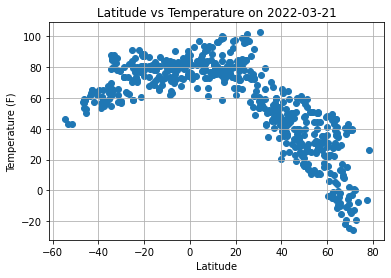

In [11]:
#format the max date in the dataset as "runDate" for graph titles
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

### Latitude vs Temperature Scatter Plot Insights
The scatter plot maps cities' temperature against their latitude. Cities selected randomly. The arc of the scatter plot shows temperature increasing near the equator (Latitude 0) and dropping off further away. Given the run date of June 2020, the plot also skews higher temperatures to the right of the equator due to summer in the northern hemisphere.

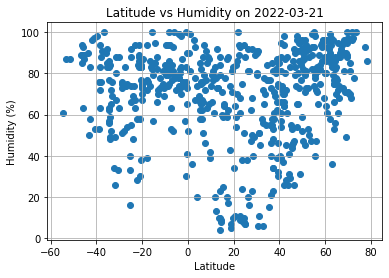

In [12]:
#set data to plot; retain Latitude from previous plot as "x"
h = City_Data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'Latitude vs Humidity on {runDate}.png')
plt.show()

### Latitude vs Humidity Scatter Plot Insights
The scatter plot maps cities' humidity against their latitude. Cities selected randomly.

The result reveals no correlation between humidity and latitude.

### Latitude vs. Cloudiness Plot


<function matplotlib.pyplot.show(close=None, block=None)>

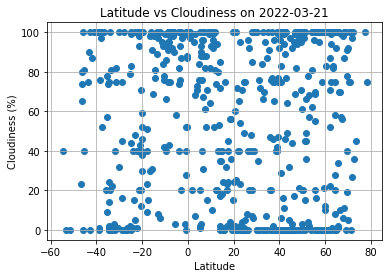

In [13]:
c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'Latitude vs Cloudiness on {runDate}.png')
plt.show

### Latitude vs Cloudiness Scatter Plot Insights
The scatter plot maps cities' cloudiness percent against their latitude. Cities selected randomly.

The result reveals no correlation between cloudiness and latitude.

### Latitude vs. Wind Speed Plot


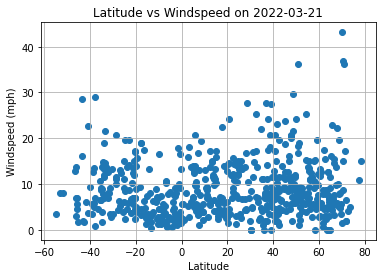

In [14]:
ws = City_Data["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'Latitude vs Windspeed on {runDate}.png')
plt.show()

### Latitude vs Wind Speed Scatter Plot Insights
The scatter plot maps cities' wind speed against their latitude. Cities selected randomly.

The result reveals no particular correlation between wind speed and latitude.

#### Linear Regression


In [15]:
# OPTIONAL: Create a function to create Linear Regression plots

#function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
#pull loc above and below the equator; note any cities directly on the equator (i.e. latitude = 0) are excluded
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-square is -0.8684134144679335
y = -1.25x + 97.82


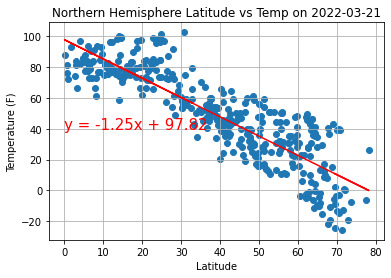

In [17]:
#set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression


The r-square is 0.638239024307667
y = 0.5x + 84.3


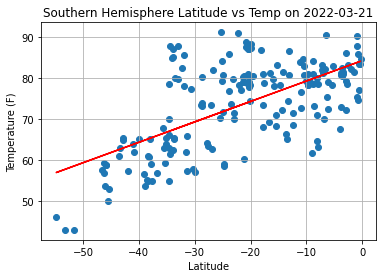

In [18]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

### North/South Latitude vs HUMIDITY Linear Regression Insights
The scatter plot maps Northern and Southern cities' humidity against their latitude. Cities selected randomly.
The result reveals no correlation between latitude and humidity.

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-square is 0.08431232936286524
y = 0.17x + 47.82


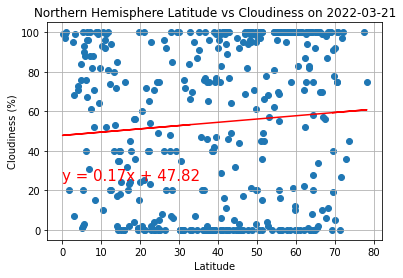

In [19]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression


The r-square is 0.29788684699970447
y = 0.83x + 76.79


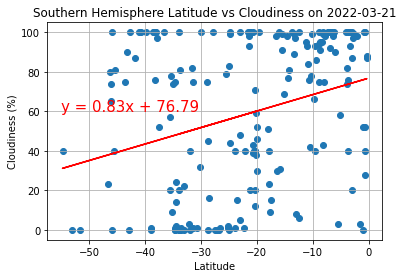

In [20]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

#### North/South Latitude vs CLOUDINESS Linear Regression Insights
The scatter plot maps Northern and Southern cities' cloudiness against their latitude. Cities selected randomly.
The result reveals no correlation between latitude and cloudiness.

### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-square is 0.05053514140115655
y = 0.02x + 8.76


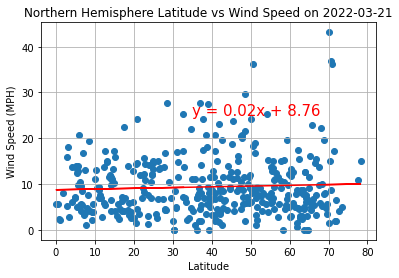

In [21]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression


The r-square is -0.27535103461833876
y = -0.11x + 5.48


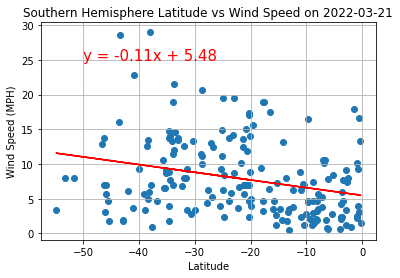

In [22]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()